**Название проекта**

Проект для «Викишоп».

**Описание проекта**

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

**Цель исследования**

Нужно обучить модель классифицировать комментарии на позитивные и негативные. В нашем распоряжении набор данных с разметкой о токсичности правок.

**Критерии исследования**

Построить модель со значением метрики качества F1 не меньше 0.75.

**Исходные данные**

Данные лежат в файле /datasets/toxic_comments.csv.  


Столбец text в нём содержит текст комментария, а toxic — целевой признак.


<a href="#qwerty">План исследования находится в меню Table of contents</a>

<a id="qwerty"></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Осмотр-данных" data-toc-modified-id="Осмотр-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Осмотр данных</a></span></li><li><span><a href="#Пропуски-в-данных" data-toc-modified-id="Пропуски-в-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропуски в данных</a></span></li><li><span><a href="#Анализ-дубликатов" data-toc-modified-id="Анализ-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ дубликатов</a></span></li><li><span><a href="#Анализ-распределений" data-toc-modified-id="Анализ-распределений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ распределений</a></span></li><li><span><a href="#Вывод-по-исследовательскому-анализу-данных" data-toc-modified-id="Вывод-по-исследовательскому-анализу-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод по исследовательскому анализу данных</a></span></li></ul></li><li><span><a href="#Очистка-и-леммантизация-данных" data-toc-modified-id="Очистка-и-леммантизация-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Очистка и леммантизация данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-обучению-моделей" data-toc-modified-id="Вывод-по-обучению-моделей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод по обучению моделей</a></span></li></ul></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ признаков</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-анализу-признаков" data-toc-modified-id="Вывод-по-анализу-признаков-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод по анализу признаков</a></span></li></ul></li><li><span><a href="#Изменение-порога-классификации" data-toc-modified-id="Изменение-порога-классификации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Изменение порога классификации</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-изменению-порога-классификации" data-toc-modified-id="Вывод-по-изменению-порога-классификации-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Вывод по изменению порога классификации</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

### Загрузка данных

In [1]:
!pip install -U scikit-learn imbalanced-learn -q
!pip install wordcloud==1.8.2.2 -q
!pip install --upgrade Pillow==9.5.0 -q
!pip install nltk -q 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from time import time
from tqdm.auto import tqdm
import shap

from wordcloud import WordCloud


from nltk.corpus import wordnet
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

from collections import Counter
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Скачиваем необходимые данные для nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
local_path = '/datasets/toxic_comments.csv'
url = 'https://code.s3.yandex.net/datasets/toxic_comments.csv'

if os.path.exists(local_path):
    df = pd.read_csv(local_path)
    print("Данные загружены из локального файла")
else:
    df = pd.read_csv(url)
    print("Данные загружены из интернета")

print(f"Размер данных: {df.shape}")
display(df.info())
df.head()

Данные загружены из интернета
Размер данных: (159292, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


None

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


Данные успешно загружены. Удалим столбец **Unnamed:0**, который копирует индексы

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


### Исследовательский анализ данных

#### Осмотр данных

In [4]:
df['toxic'].unique()

array([0, 1], dtype=int64)

Целевой признак бинарный

#### Пропуски в данных

In [5]:
df.isna().sum()

text     0
toxic    0
dtype: int64

Пропуски в данных отсутствуют

#### Анализ дубликатов

In [6]:
df['text'].duplicated().sum()

0

In [7]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют

#### Анализ распределений

Посмотрим на распределение целевого признака **toxic**

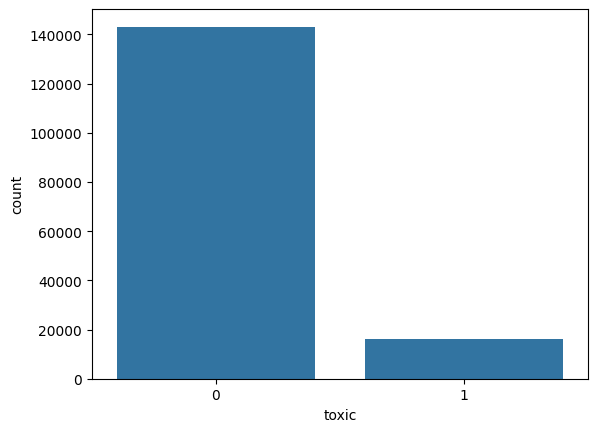

In [8]:
sns.countplot(x=df['toxic']);

Наблюдается дисбаланс классов. Учтем при обучении моделей.

#### Вывод по исследовательскому анализу данных

* Пропуски в данных отсутствуют
* Дубликаты отсутствуют
* Наблюдается явный **дисбаланс классов** целевого признака

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Добавил ниже более подробный анализ текста.</div>

Создадим облака слов для визуального сравнения самых популярных тосксичных и нетоксичных выражений.

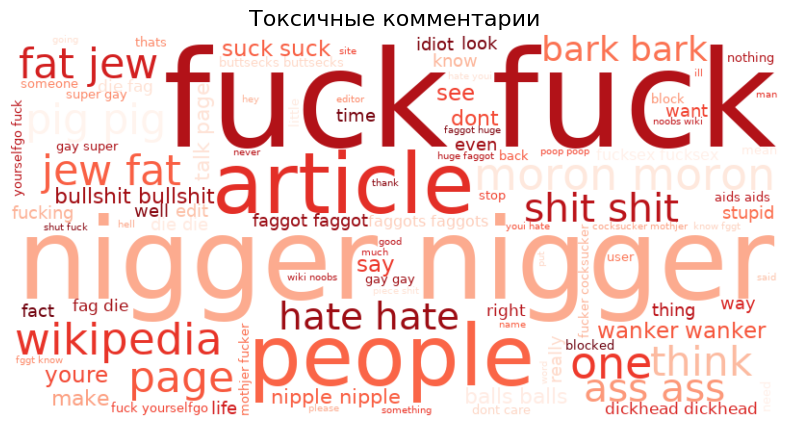

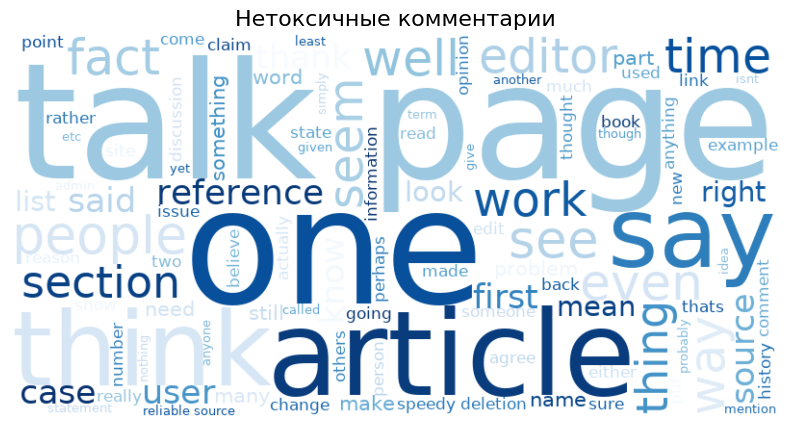

In [9]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return ' '.join(words)

toxic_texts = df[df['toxic'] == 1]['text'].apply(preprocess_text)
non_toxic_texts = df[df['toxic'] == 0]['text'].apply(preprocess_text)

def generate_wordcloud(texts, title, font_path=None):
    all_text = ' '.join(texts)
    
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=100,
        colormap='Reds' if 'Токсичные' in title else 'Blues',
        font_path=font_path
    ).generate(all_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

font_paths = [
    '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf'
]

# Создаем облака слов
for font_path in font_paths:
    try:
        generate_wordcloud(toxic_texts, 'Токсичные комментарии', font_path)
        generate_wordcloud(non_toxic_texts, 'Нетоксичные комментарии', font_path)
        break
    except:
        print("Ошибка")
        continue

Теперь взглянем на цифры, детальнее изучим облака слов.

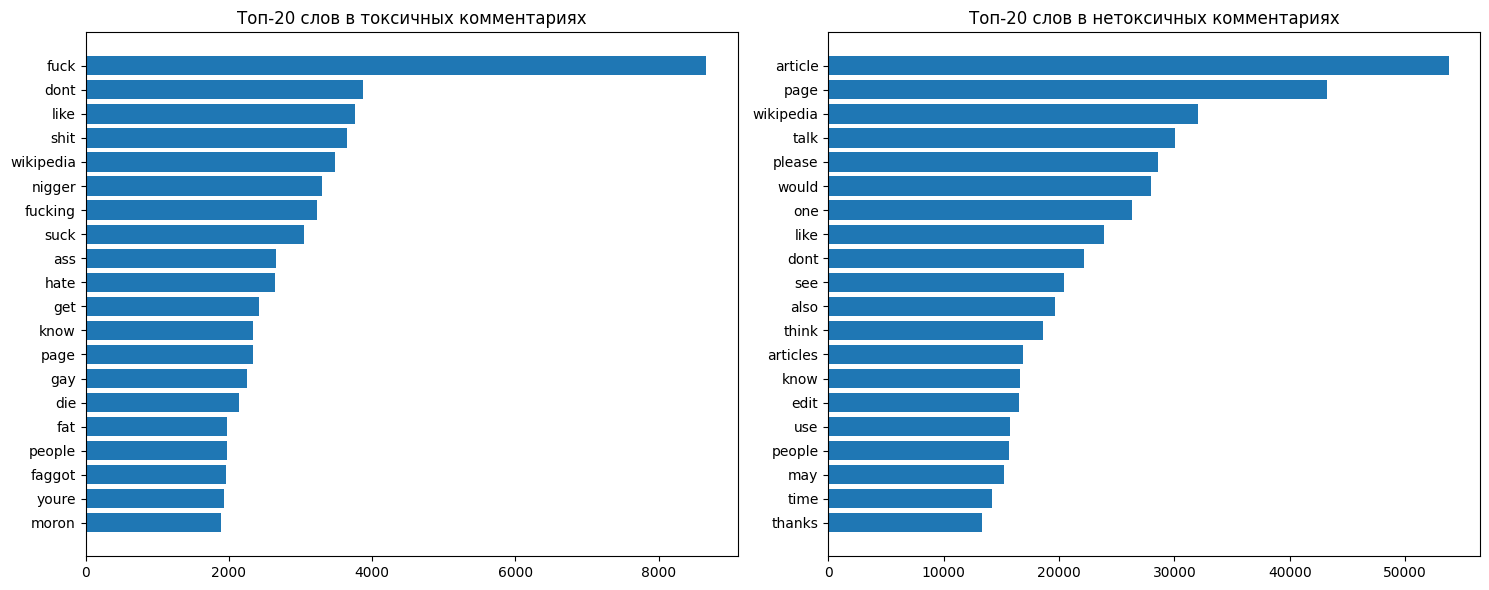

In [10]:
# Функция для анализа частотности слов
def analyze_word_frequency(texts, top_n=20):
    all_words = ' '.join(texts).split()
    word_freq = Counter(all_words)
    return word_freq.most_common(top_n)

# Анализ для каждого класса
toxic_freq = analyze_word_frequency(toxic_texts)
non_toxic_freq = analyze_word_frequency(non_toxic_texts)

# Визуализация частотных слов
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Токсичные слова
toxic_words, toxic_counts = zip(*toxic_freq)
axes[0].barh(range(len(toxic_words)), toxic_counts)
axes[0].set_yticks(range(len(toxic_words)))
axes[0].set_yticklabels(toxic_words)
axes[0].set_title('Топ-20 слов в токсичных комментариях')
axes[0].invert_yaxis()

# Нетоксичные слова
non_toxic_words, non_toxic_counts = zip(*non_toxic_freq)
axes[1].barh(range(len(non_toxic_words)), non_toxic_counts)
axes[1].set_yticks(range(len(non_toxic_words)))
axes[1].set_yticklabels(non_toxic_words)
axes[1].set_title('Топ-20 слов в нетоксичных комментариях')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

Токсичные комментарии содержат ненормативную лексику, нежели нетоксичные, что ожидаемо. 

Также можно заметить, что слово **wikipedia** присутствует в топе токсичных и нетоксичных комментариев. Скорее всего, большинство обсуждений ведется вокруг статей на википедии. 

============================

Теперь посмотрим на длину текста, количество слов, среднюю длину слова в разбивке по целевому признаку.

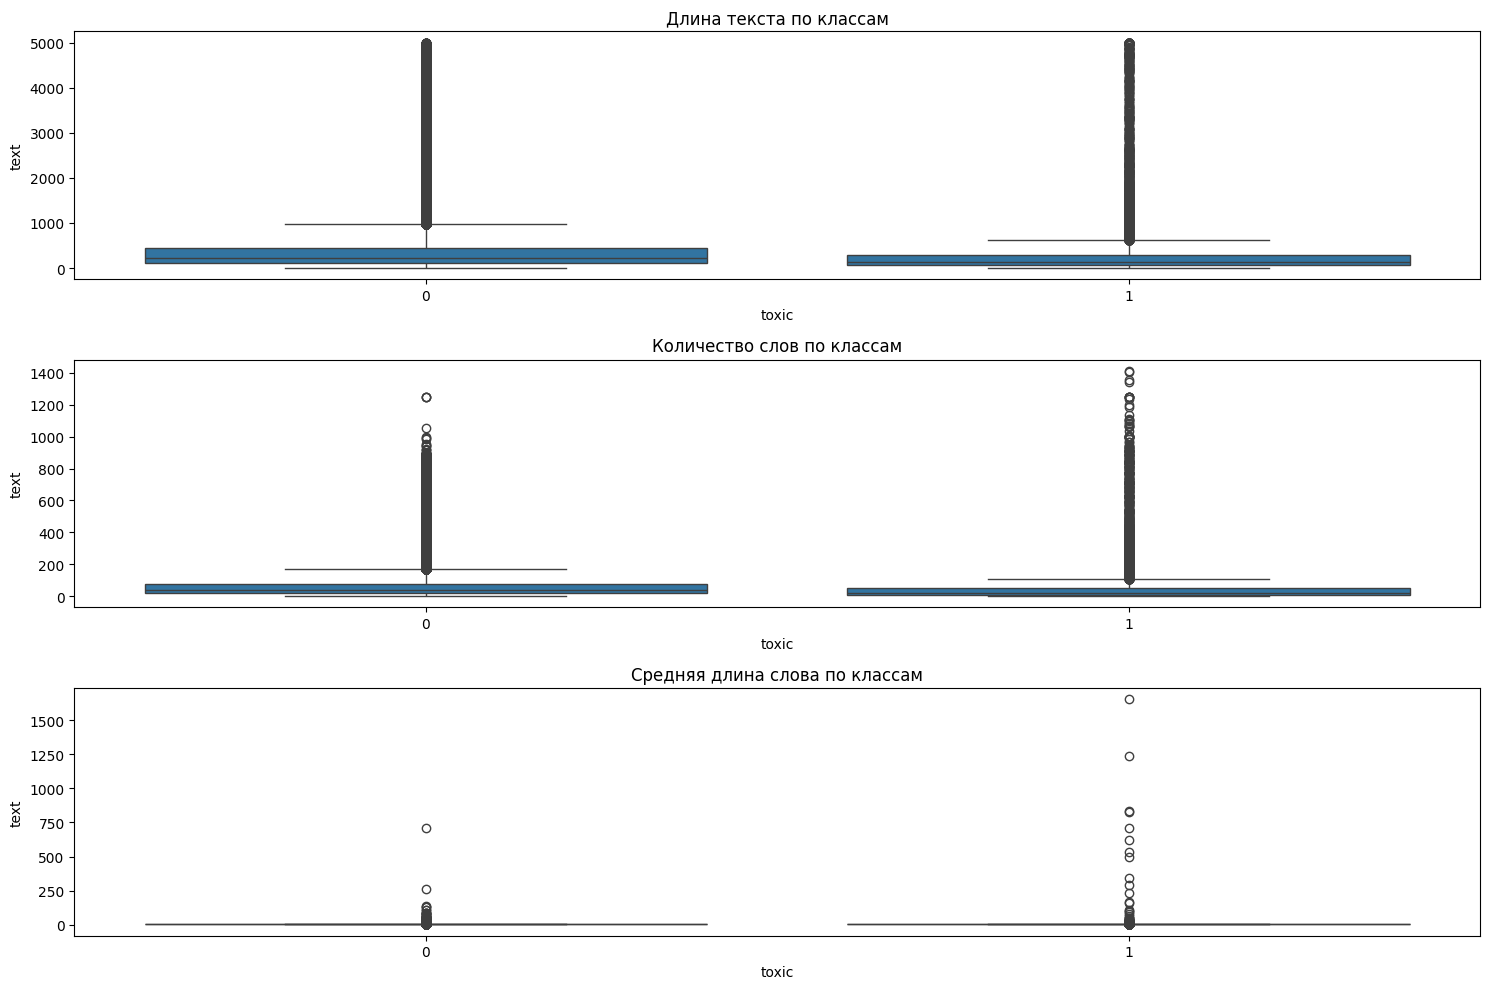

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Длина текста
sns.boxplot(
    data=df,
    x='toxic',
    y=df['text'].apply(len),
    ax=axes[0]
)
axes[0].set_title('Длина текста по классам')

# Количество слов
sns.boxplot(
    data=df,
    x='toxic',
    y=df['text'].apply(lambda x: len(x.split())),
    ax=axes[1]
)
axes[1].set_title('Количество слов по классам')

# Средняя длина слова
sns.boxplot(
    data=df,
    x='toxic',
    y=df['text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if x.split() else 0),
    ax=axes[2]
)
axes[2].set_title('Средняя длина слова по классам')

plt.tight_layout()
plt.show()

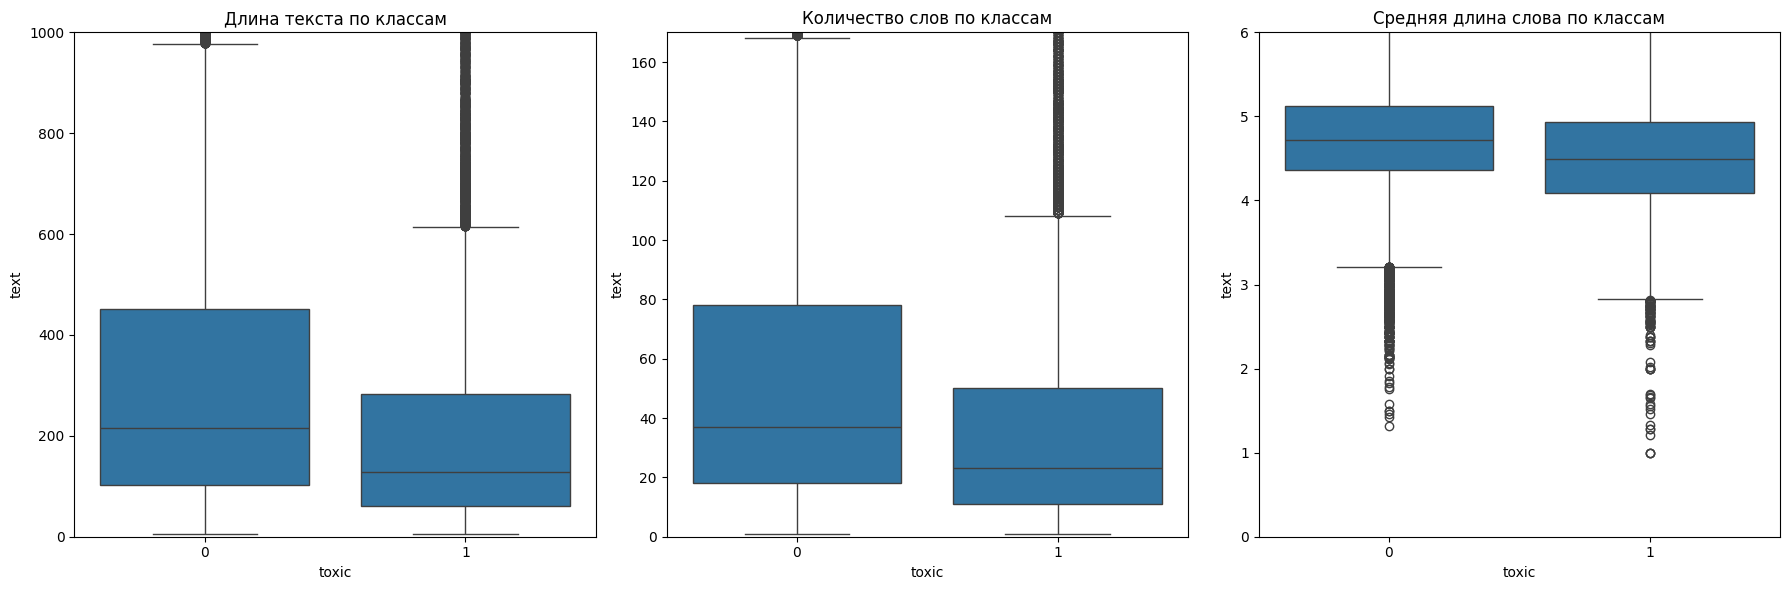

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Длина текста
sns.boxplot(
    data=df,
    x='toxic',
    y=df['text'].apply(len),
    ax=axes[0]
)
axes[0].set_title('Длина текста по классам')
axes[0].set_ylim(0, 1000)  

# Количество слов
sns.boxplot(
    data=df,
    x='toxic',
    y=df['text'].apply(lambda x: len(x.split())),
    ax=axes[1]
)
axes[1].set_title('Количество слов по классам')
axes[1].set_ylim(0, 170)   

# Средняя длина слова
sns.boxplot(
    data=df,
    x='toxic',
    y=df['text'].apply(lambda x: np.mean([len(word) for word in x.split()]) if x.split() else 0),
    ax=axes[2]
)
axes[2].set_title('Средняя длина слова по классам')
axes[2].set_ylim(0, 6)    
plt.tight_layout()
plt.show()


Сильно выраженных различий между классами по этим текстовым характеристикам нет.

### Очистка и леммантизация данных

Подготовку данных разобьем на этапы:

* Проводим леммантизацию текста с использованием WordNetLemmatizer
* Очищаем текст, оставляя только латинские символы и пробелы, удаляя все остальные символы






In [14]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemm_(text):
    # токенизация
    tokens = nltk.word_tokenize(text)

    # оставляем только латинские слова
    tokens = [w for w in tokens if re.fullmatch(r"[A-Za-z]+", w)]

    # убираем стоп-слова
    tokens = [w for w in tokens if w.lower() not in stop_words]

    pos_tags = nltk.pos_tag(tokens)

    # лемматизация с использованием POS-тегов
    lemmatized_tokens = []
    for word, tag in pos_tags:
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        wn_tag = tag_dict.get(tag[0].upper(), wordnet.NOUN)
        lemmatized_tokens.append(lemmatizer.lemmatize(word, wn_tag))

    return ' '.join(lemmatized_tokens)


In [15]:
print('было')
sentence1 = "The striped bats are hanging on their feet for best"
sentence2 = "you should be ashamed of yourself went worked"
df_my = pd.DataFrame([sentence1, sentence2])

print(df_my)
print('\n')


print('стало после лемматизации\n')
# и попробуем нашу функцию c помощью apply
print(df_my[0].apply(lemm_))

было
                                                   0
0  The striped bats are hanging on their feet for...
1      you should be ashamed of yourself went worked


стало после лемматизации

0    strip bat hang foot best
1           ashamed go worked
Name: 0, dtype: object


In [16]:
tqdm.pandas()
df['lemm_text'] = df['text'].progress_apply(lemm_)

  0%|          | 0/159292 [00:00<?, ?it/s]

In [17]:
print('Исходный текст')
display(df['text'][0])
print('Леммантизированный текст')
df['lemm_text'][0]

Исходный текст


"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

Леммантизированный текст


'Explanation edits make username Hardcore Metallica Fan revert vandalisms closure GAs vote New York Dolls FAC please remove template talk page since retire'

### Обучение моделей

Обучим 2 модели:
* PassiveAggressiveClassifier
* LogisticRegression

Отберем лучшую модель по результатам кросс валидации на тренировочной выборке. Затем протестируем ее на тестовой выборке.

Подбор гиперпараметров выполним с помощью GridSearchCV.

Выполним векторизацию с помощью TF-IDF и обучение моделей в пайплайне.

In [18]:
# Разделение данных
X = df['lemm_text']  
y = df['toxic']      

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,          
    random_state=42,         
    stratify=y              
)

print("Размеры выборок:")
print(f"Обучающая: {X_train.shape[0]} текстов")
print(f"Тестовая: {X_test.shape[0]} текстов")

Размеры выборок:
Обучающая: 127433 текстов
Тестовая: 31859 текстов


In [19]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
    ('model', LogisticRegression(random_state=42))
])

param_grid = [
    # LogisticRegression
    {
        'tfidf__max_features': [10000],
        'model': [LogisticRegression(random_state=42)],
        'model__solver': ['lbfgs'],
        'model__penalty': ['l2'],
        'model__C': [1, 10],
        'model__class_weight': [None]
    },
    
    # PassiveAggressiveClassifier
    {
        'tfidf__max_features': [10000],
        'model': [PassiveAggressiveClassifier(random_state=42)],
        'model__C': [0.1, 1, 10],
        'model__early_stopping': [True, False]
    }
]

In [20]:
start = time()
grid_search = GridSearchCV(
    pipe, 
    param_grid=param_grid,
    cv=3, 
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
end = time()


print('Лучшая модель и параметры:')
print(grid_search.best_estimator_)
print(f'\nЛучшая метрика F1 на кросс-валидации: {grid_search.best_score_:.4f}')
print(f'Время выполнения: {(end-start)/60:.2f} мин')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Лучшая модель и параметры:
Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, stop_words='english')),
                ('model', PassiveAggressiveClassifier(C=0.1, random_state=42))])

Лучшая метрика F1 на кросс-валидации: 0.7703
Время выполнения: 2.17 мин


In [21]:
# Оценка на тестовой выборке
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

print('Результаты на тестовой выборке:')
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")

Результаты на тестовой выборке:
F1-score: 0.7697


#### Вывод по обучению моделей

Было 2 кандидата:

* PassiveAggressiveClassifier
* LogisticRegression

Лучшей оказалась модель **PassiveAggressiveClassifier**.  Метрика f1 той модели удовлетворяет требованию заказчика (f1 >= 0.75)

In [22]:
print('Лучшая модель и параметры:')
print(grid_search.best_estimator_)

Лучшая модель и параметры:
Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, stop_words='english')),
                ('model', PassiveAggressiveClassifier(C=0.1, random_state=42))])


### Анализ признаков

В этом разделе посмотрим, какие признаки оказались для лучшей модели самыми важными.

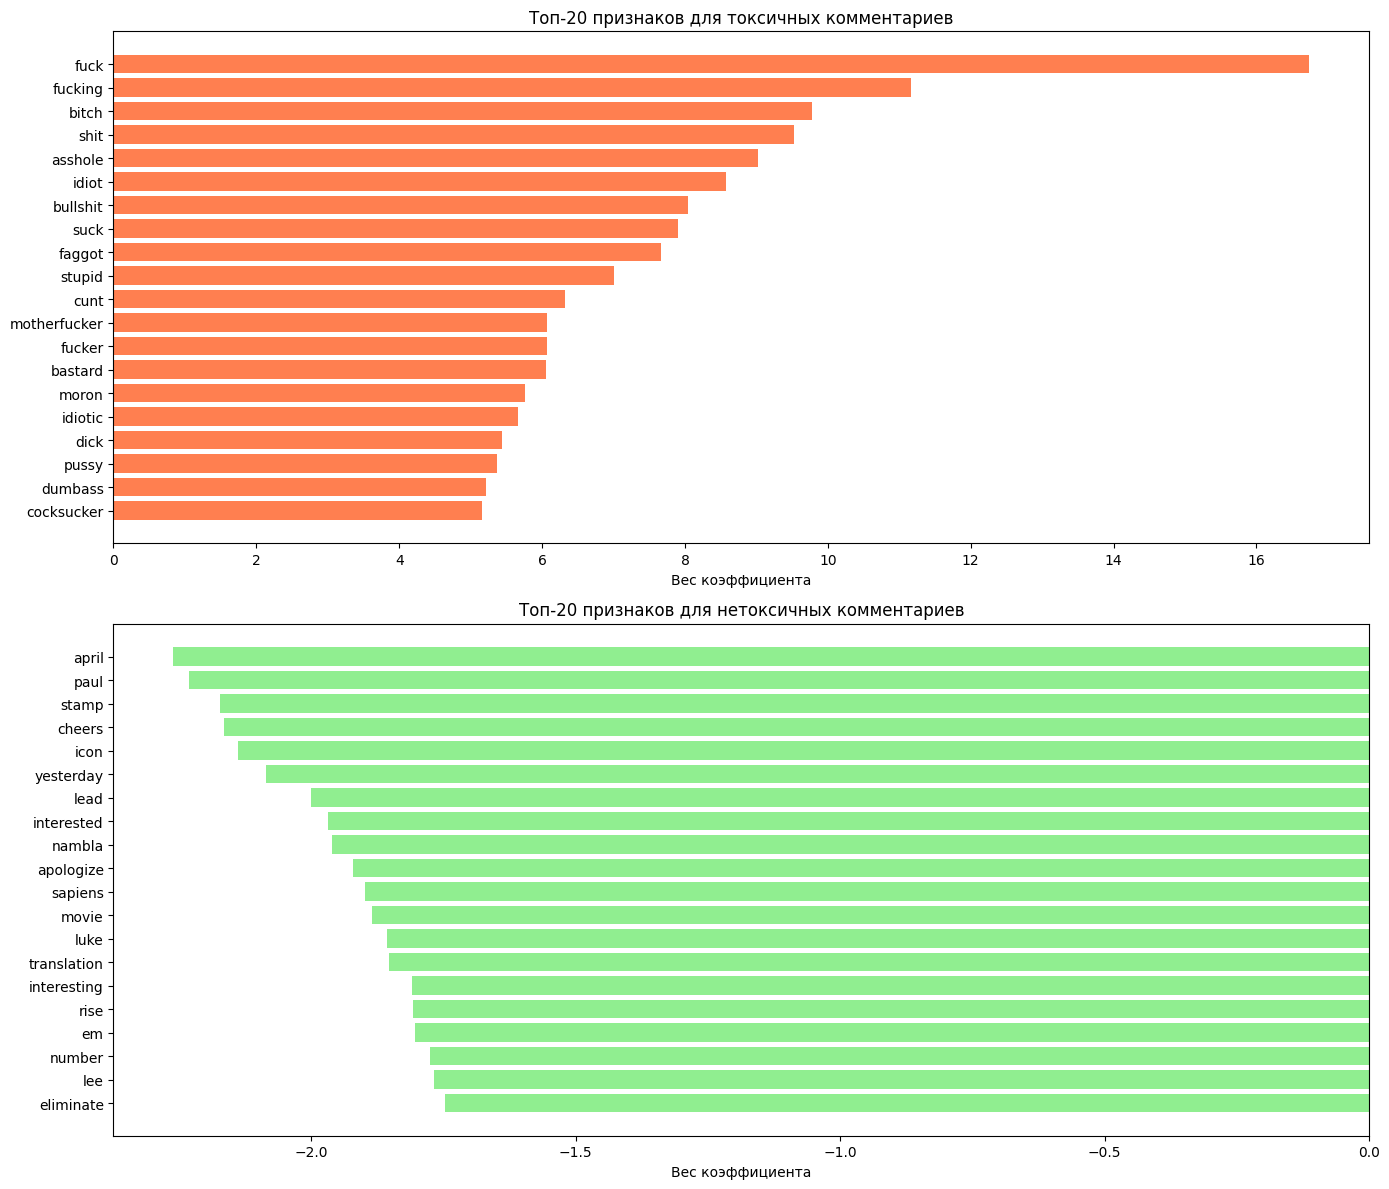

In [23]:
feature_names = best_pipeline.named_steps['tfidf'].get_feature_names_out()
coefficients = best_pipeline.named_steps['model'].coef_[0]

# Топ-20 для токсичных и нетоксичных
top_toxic_idx = np.argsort(coefficients)[-20:][::-1]
top_normal_idx = np.argsort(coefficients)[:20]

toxic_features = [feature_names[i] for i in top_toxic_idx]
toxic_weights = [coefficients[i] for i in top_toxic_idx]

normal_features = [feature_names[i] for i in top_normal_idx]
normal_weights = [coefficients[i] for i in top_normal_idx]

plt.figure(figsize=(14, 12))

# Токсчиные признаки
plt.subplot(2, 1, 1)
y_pos = np.arange(len(toxic_features))
plt.barh(y_pos, toxic_weights, color='coral')
plt.yticks(y_pos, toxic_features)
plt.xlabel('Вес коэффициента')
plt.title('Топ-20 признаков для токсичных комментариев')
plt.gca().invert_yaxis()

# Нетоксичные признаки
plt.subplot(2, 1, 2)
y_pos = np.arange(len(normal_features))
plt.barh(y_pos, normal_weights, color='lightgreen')
plt.yticks(y_pos, normal_features)
plt.xlabel('Вес коэффициента')
plt.title('Топ-20 признаков для нетоксичных комментариев')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

LinearExplainer explainer: 31860it [00:13, 536.76it/s]                                                                 


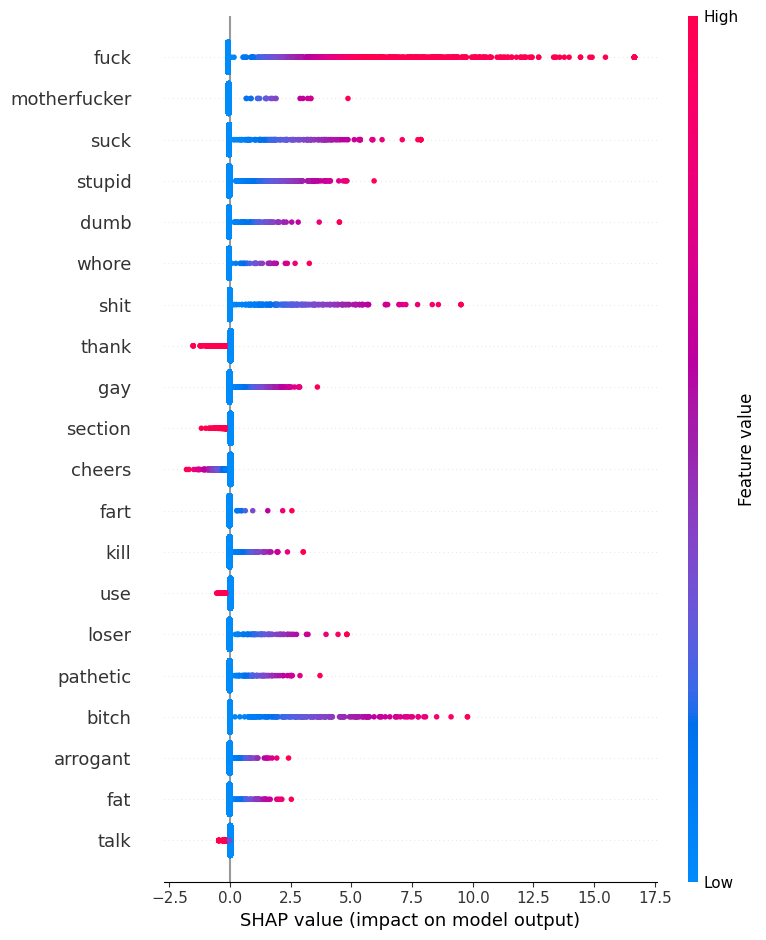

In [24]:
explainer = shap.Explainer(best_pipeline.named_steps['model'], 
                          masker=best_pipeline.named_steps['tfidf'].transform(X_train).toarray())

X_test_transformed = best_pipeline.named_steps['tfidf'].transform(X_test).toarray()
shap_values = explainer(X_test_transformed)

shap.summary_plot(shap_values, X_test_transformed, 
                  feature_names=best_pipeline.named_steps['tfidf'].get_feature_names_out(),
                  max_display=20)

#### Вывод по анализу признаков

Модель верно определяет токсичные выражения. Топ 20 признаков в токсичных выражениях - это нецензурные слова.

### Изменение порога классификации

Лучшая модель **PassiveAggressiveClassifier** не возвращает вероятности принадлежности классам. Преобраззуем ее предсказания через сигмоидную функцию, чтобы получить вероятности.

Затем поэкспериментируем с порогом классификации.

In [26]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
    ('model', CalibratedClassifierCV(
        estimator=PassiveAggressiveClassifier(random_state=42),
        method='sigmoid',
        cv=3
    ))
])

param_grid = [
    {
        'tfidf__max_features': [10000],
        'model__estimator__C': [0.1, 1, 10],
        'model__estimator__early_stopping': [True, False]
    }
]

# GridSearch
grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_pipeline = grid_search.best_estimator_

print('go')
# Получаем предсказания через кросс-валидацию на тренировочных данных
y_proba_cv = cross_val_predict(best_pipeline, X_train, y_train, 
                              cv=2, method='predict_proba')[:, 1]

# Подбираем порог на кросс-валидационных предсказаниях
thresholds = np.linspace(0.1, 0.9, 20)
best_f1 = 0
best_threshold = 0.5

for threshold in thresholds:
    y_pred_cv = (y_proba_cv >= threshold).astype(int)
    f1 = f1_score(y_train, y_pred_cv)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Лучший порог (CV): {best_threshold:.3f}")
print(f"F1 на кросс-валидации: {best_f1:.4f}")

# Обучаем финальную модель на всех тренировочных данных
best_pipeline.fit(X_train, y_train)

# Финальная оценка на тестовой выборке
y_proba_test = best_pipeline.predict_proba(X_test)[:, 1]
y_pred_test = (y_proba_test >= best_threshold).astype(int)
test_f1 = f1_score(y_test, y_pred_test)

print(f"F1 на тестовой выборке: {test_f1:.4f}")
print(f"Best parameters: {grid_search.best_params_}")

go
Лучший порог (CV): 0.311
F1 на кросс-валидации: 0.7770
F1 на тестовой выборке: 0.7755
Best parameters: {'model__estimator__C': 0.1, 'model__estimator__early_stopping': True, 'tfidf__max_features': 10000}


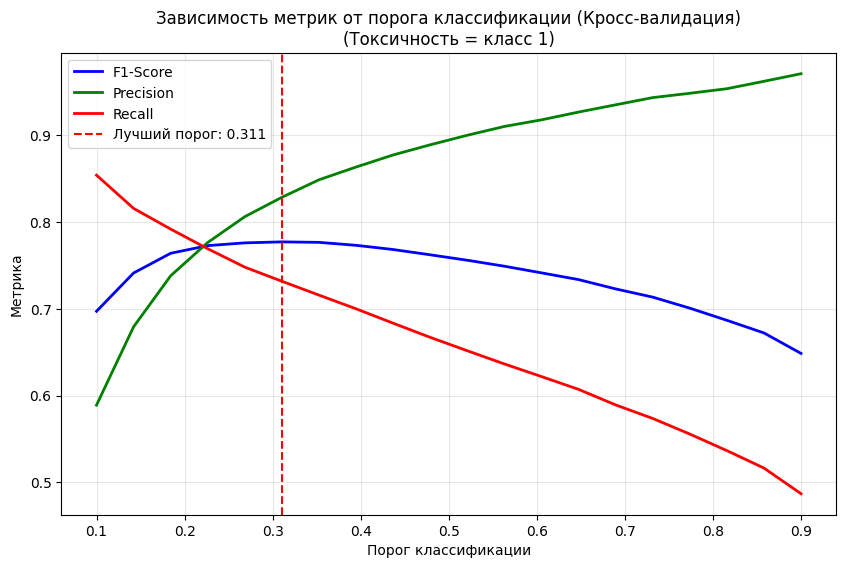

Лучший порог (кросс-валидация): 0.311
Лучший F1 (кросс-валидация): 0.7770
Precision при этом пороге: 0.8284
Recall при этом пороге: 0.7316

Метрики вокруг лучшего порога (кросс-валидация):
Порог 0.268: F1=0.7759, Precision=0.8061, Recall=0.7479 
Порог 0.311: F1=0.7770, Precision=0.8284, Recall=0.7316 ← ЛУЧШИЙ
Порог 0.353: F1=0.7765, Precision=0.8485, Recall=0.7157 

=== ФИНАЛЬНАЯ ОЦЕНКА НА ТЕСТЕ ===
F1 на тестовой выборке: 0.7755
Precision на тесте: 0.8327
Recall на тесте: 0.7257


In [27]:
# Получаем предсказания через кросс-валидацию на тренировочных данных
y_proba_cv = cross_val_predict(best_pipeline, X_train, y_train, 
                              cv=2, method='predict_proba')[:, 1]

thresholds = np.linspace(0.1, 0.9, 20)

# Считаем метрики на кросс-валидационных предсказаниях
f1_scores = [f1_score(y_train, (y_proba_cv >= t).astype(int)) for t in thresholds]
precision_scores = [precision_score(y_train, (y_proba_cv >= t).astype(int)) for t in thresholds]
recall_scores = [recall_score(y_train, (y_proba_cv >= t).astype(int)) for t in thresholds]

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, 'b-', linewidth=2, label='F1-Score')
plt.plot(thresholds, precision_scores, 'g-', linewidth=2, label='Precision')
plt.plot(thresholds, recall_scores, 'r-', linewidth=2, label='Recall')

plt.axvline(x=best_threshold, color='r', linestyle='--', 
            label=f'Лучший порог: {best_threshold:.3f}')

plt.xlabel('Порог классификации')
plt.ylabel('Метрика')
plt.title('Зависимость метрик от порога классификации (Кросс-валидация)\n(Токсичность = класс 1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Лучший порог (кросс-валидация): {best_threshold:.3f}")
print(f"Лучший F1 (кросс-валидация): {f1_scores[best_idx]:.4f}")
print(f"Precision при этом пороге: {precision_scores[best_idx]:.4f}")
print(f"Recall при этом пороге: {recall_scores[best_idx]:.4f}")

print("\nМетрики вокруг лучшего порога (кросс-валидация):")
for i in range(max(0, best_idx-1), min(len(thresholds), best_idx+2)):
    mark = "← ЛУЧШИЙ" if i == best_idx else ""
    print(f"Порог {thresholds[i]:.3f}: F1={f1_scores[i]:.4f}, "
          f"Precision={precision_scores[i]:.4f}, Recall={recall_scores[i]:.4f} {mark}")

# Обучаем финальную модель на всех тренировочных данных с лучшим порогом
best_pipeline.fit(X_train, y_train)

# Финальная оценка на тестовой выборке
y_proba_test = best_pipeline.predict_proba(X_test)[:, 1]
y_pred_test = (y_proba_test >= best_threshold).astype(int)

test_f1 = f1_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)

print(f"\n=== ФИНАЛЬНАЯ ОЦЕНКА НА ТЕСТЕ ===")
print(f"F1 на тестовой выборке: {test_f1:.4f}")
print(f"Precision на тесте: {test_precision:.4f}")
print(f"Recall на тесте: {test_recall:.4f}")

#### Вывод по изменению порога классификации

Наибольшее значение метрики `F1 = 0.7755` достигается при пороге классификации примерно равным 0.311.

При этом:

* Комментарий помечается как токсичный уже при 31.1% уверенности модели

* Это важно для модерации - лучше удалить лишнее, чем пропустить токсичное

* Мы находим 73% всей токсичности, при этом 83% наших подозрений оказываются верными

### Вывод

**Цель проекта** была достигнута: разработана модель машинного обучения для разметки тональности текста.

**1. Анализ и предобработка данных**

В данных 159292 строки.

На этапе осмотра данных были сделаны выводы:
* Пропуски в данных отсутствуют
* Дубликаты отсутствуют
* Наблюдается явный **дисбаланс классов** целевого признака

**2. Выбор и оценка моделей**

Было 2 кандидата:

* PassiveAggressiveClassifier
* LogisticRegression

Лучшей оказалась модель **PassiveAggressiveClassifier**.  Метрика f1 той модели удовлетворяет требованию заказчика (f1 >= 0.75)

**3. Результаты и выбор финальной модели**

Наибольшее значение метрики `F1 = 0.7755` достигается при пороге классификации примерно равным 0.311.

При этом:

* Комментарий помечается как токсичный уже при 31.1% уверенности модели

* Это важно для модерации - лучше удалить лишнее, чем пропустить токсичное

* Мы находим 73% всей токсичности, при этом 83% наших подозрений оказываются верными
